In [120]:
!pip install numpy matplotlib pandas tqdm

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Huawei\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [121]:
import json

import matplotlib.pyplot as plt
import pandas as pd

In [122]:
with open("bench.json", encoding="utf-8") as f:
    metrics = json.load(f)

In [123]:
pd.set_option('display.max_rows', 30)

dots = [{"n": v["n"], "dtype": v["type"], **v["tests"][0]} for v in metrics if "n" in v]
gemms = [{"n": v["mnk"][0], "dtype": v["type"], **v["tests"][0]} for v in metrics if "mnk" in v]

dot_df = pd.DataFrame(dots)
gemms_df = pd.DataFrame(gemms)

In [124]:
dot_df[dot_df["n"] == 10e7*8].sort_values(by="gflops", ascending=False)

,n,dtype,gflops,result,runtime
28,800000000,float,15.533950,2.515442e+08,OpenMP
30,800000000,float,2.611418,2.586420e+08,OpenBLAS
54,800000000,float,2.160858,2.666448e+08,CLBlast
31,800000000,double,0.365360,2.666473e+08,OpenBLAS
29,800000000,double,0.135462,2.666473e+08,OpenMP
53,800000000,float,0.039600,2.666469e+08,OpenCL


In [125]:
gemms_df[gemms_df["n"] == 8192].sort_values(by="gflops", ascending=False)


,n,dtype,gflops,result,runtime
50,8192,float,1222.573828,-180260.828125,CLBlast
51,8192,double,114.309217,-180225.326798,CLBlast
48,8192,float,80.518644,-180260.828125,OpenCL
49,8192,double,41.710810,-180225.326798,OpenCL


In [ ]:
def plot_metrics(metrics_df):
    markers = ["o", "s", "^", "D"]
    items = metrics_df.groupby("runtime")

    for i, (runtime, group) in enumerate(items):
        group = group.groupby("n", as_index=False).mean(numeric_only=True)

        plt.plot(group["n"],
                 group["gflops"],
                #  linestyle='',
                 marker=markers[i % len(markers)],
                 markersize=7,
                 label=runtime)

    plt.ticklabel_format(axis="x", style="sci", scilimits=(0, 0)) 
    plt.xscale("log")
    plt.xlabel("N", labelpad=2)
    plt.ylabel("GFLOPS", labelpad=2)
    plt.legend()

    plt.legend(fontsize=10, loc="best", frameon=False)
    plt.tight_layout()
    plt.show()

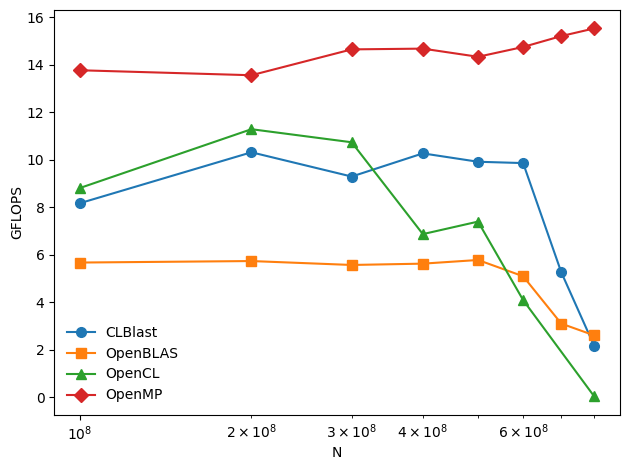

In [127]:
plot_metrics(dot_df[dot_df["dtype"] == "float"])

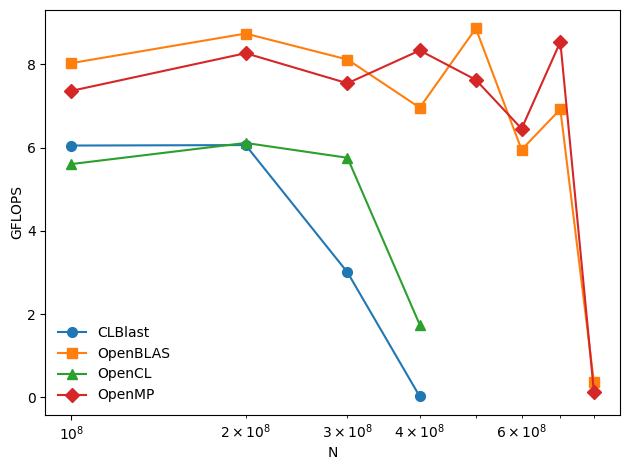

In [128]:
plot_metrics(dot_df[dot_df["dtype"] == "double"])

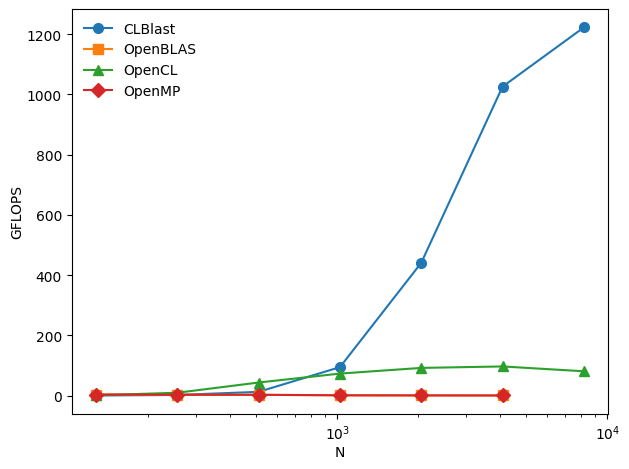

In [129]:
plot_metrics(gemms_df[gemms_df["dtype"] == "float"])

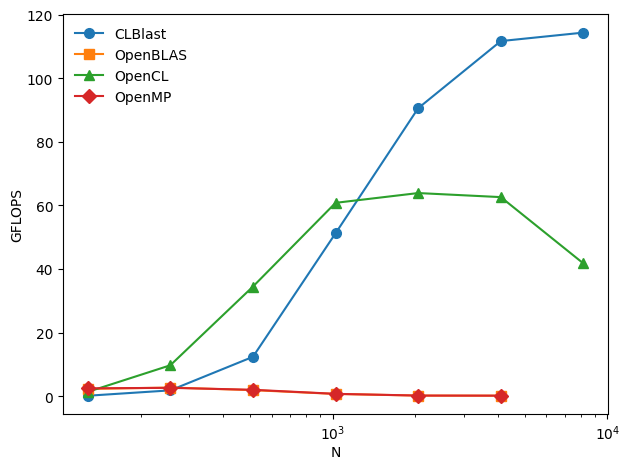

In [130]:
plot_metrics(gemms_df[gemms_df["dtype"] == "double"])